###At what point in high school do students give up on math? Identifying knowledge gaps in high school and college math education using Stack Exchange's Math forum

#### Additional Questions:
    1. What are the most popular subjects over time? (Upvotes, Favorites and Views)
    2. What are the most hotly debated subjects over time? (Comment Count, Longevity)
    3. What are the most fundamental subjects students are asking about over time? (Asked multiple times, answered quickly and by only a few commenters)
    4. What are the demographics of the posters and commenters? (Education level, age and location)
    5. Who are the most active math people? How quickly do they reply? Who has way too much free time?
    6. Can I determine sex from username?

In [1]:
import numpy as np
import pandas as pd

from xml.etree import ElementTree as ET
from HTMLParser import HTMLParser

import matplotlib.pyplot as plt
%matplotlib inline 
import seaborn as sns

In [35]:
class MLStripper(HTMLParser):
    def __init__(self):
        self.reset()
        self.fed = []
    def handle_data(self, d):
        self.fed.append(d)
    def get_data(self):
        return ''.join(self.fed)

def strip_tags(html):
    s = MLStripper()
    s.feed(html)
    return s.get_data()

In [36]:
etree = ET.parse('Data/Math/math.stackexchange.com/Posts.xml')
root = etree.getroot()
i = 0
postdicts = []
for x in root.iter():
    postdicts.append(x.attrib)
postdata = pd.DataFrame(postdicts).ix[1:]

In [37]:
for index, row in postdata.iterrows():
    row['Body'] = strip_tags(row['Body'])

In [32]:
etree = ET.parse('Data/Math/math.stackexchange.com/Users.xml')
root = etree.getroot()
i = 0
userdicts = []
for x in root.iter():
    userdicts.append(x.attrib)
userdata = pd.DataFrame(userdicts).ix[1:]

In [33]:
userdata.replace(to_replace=['Bangalore, India','London, United Kingdom','New York, United States','San Francisco, CA','Mumbai, India','Paris, France','Sydney, Australia','Toronto, Canada','Moscow, Russia','Chennai, India','Los Angeles, CA','Berlin, Germany','Montreal, Canada','Melbourne, Australia','Hyderabad, India','Pune, India','Beijing, China','Vancouver, Canada','Stockholm, Sweden','Kolkata, India','New Delhi, India','UK','London'], 
                 value=['India','United Kingdom','New York, NY','California','India','France','Australia','Canada','Russia','India','California','Germany','Canada','Australia','India','India','China','Canada','Sweden','India','India','United Kingdom','United Kingdom'],inplace=True)

In [34]:
userdata.replace(to_replace=['California','New York, NY','Seattle, WA','Boston, MA','Chicago, IL','Austin, TX','Atlanta, GA','Pittsburgh, PA','Portland, OR','USA','San Diego, CA','Berkeley, CA'],value='United States',inplace=True)

In [35]:
def counter(x):
    x['Counter'] = x.Location.count()
    return x
counts = userdata.groupby("Location").apply(counter)
counts2 = counts[['Location','Counter']]
counts3 = counts2.drop_duplicates(cols='Location',take_last = True)
counts3.sort(columns='Counter',ascending=False,inplace=True)
counts4 = counts3[['Location','Counter']]
# userdata2.sort(columns='',ascending=False,inplace=True)

/usr/local/lib/python2.7/site-packages/pandas/util/decorators.py:81: FutureWarning: the 'cols' keyword is deprecated, use 'subset' instead
  warnings.warn(msg, FutureWarning)


In [36]:
counts4.head(30)

,Location,Counter
171513,United States,3945
171322,India,2706
171622,United Kingdom,1482
171489,Germany,902
171132,Canada,877
171559,Australia,623
170315,France,576
171718,Russia,462
167586,Sweden,382
171098,Netherlands,325


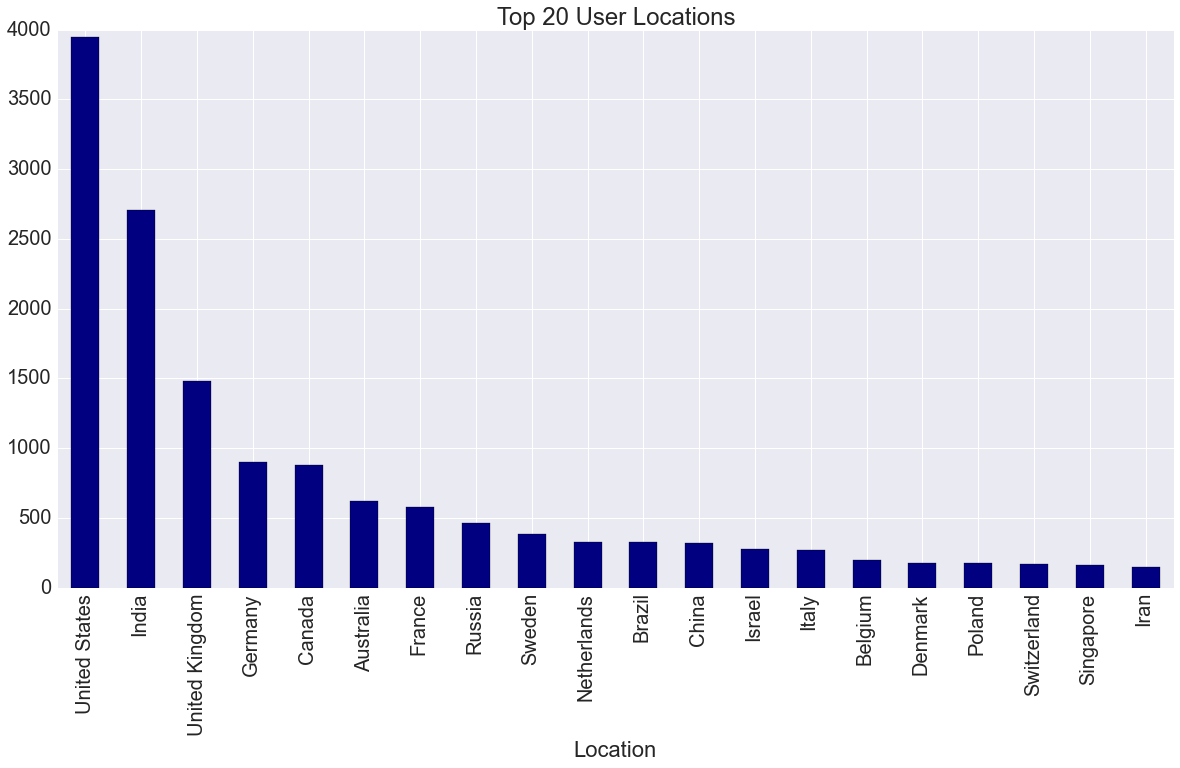

In [56]:
# Who are the users of the Math Forum?
sns.set_palette("deep", desat=.8)
sns.set(font_scale=2.0)
sns.set_context(rc={"figure.figsize": (20, 10)})   
ax = counts4[0:20].plot(x='Location', y='Counter',kind='bar',colormap='jet',title='Top 20 User Locations',legend=False)

In [39]:
postdata = pd.merge(postdata, userdata, left_on='OwnerUserId', right_on='Id', how='left')

In [40]:
etree = ET.parse('Data/Math/math.stackexchange.com/Comments.xml')
root = etree.getroot()
i = 0
commentdicts = []
for x in root.iter():
    commentdicts.append(x.attrib)
commentdata = pd.DataFrame(commentdicts).ix[1:]

In [41]:
for index, row in commentdata.iterrows():
    row['Text'] = strip_tags(row['Text'])

In [42]:
commentdata = pd.merge(commentdata, userdata, left_on='UserId', right_on='Id', how='left')

In [43]:
commentdata.columns

Index([u'CreationDate_x', u'Id_x', u'PostId', u'Score', u'Text', u'UserDisplayName', u'UserId', u'AboutMe', u'AccountId', u'Age', u'CreationDate_y', u'DisplayName', u'DownVotes', u'Id_y', u'LastAccessDate', u'Location', u'ProfileImageUrl', u'Reputation', u'UpVotes', u'Views', u'WebsiteUrl'], dtype='object')

In [223]:
postdata.columns

Index([u'AcceptedAnswerId', u'AnswerCount', u'Body', u'ClosedDate', u'CommentCount', u'CommunityOwnedDate', u'CreationDate_x', u'FavoriteCount', u'Id_x', u'LastActivityDate', u'LastEditDate', u'LastEditorDisplayName', u'LastEditorUserId', u'OwnerDisplayName', u'OwnerUserId', u'ParentId', u'PostTypeId', u'Score', u'Tags', u'Title', u'ViewCount', u'AboutMe', u'AccountId', u'Age', u'CreationDate_y', u'DisplayName', u'DownVotes', u'Id_y', u'LastAccessDate', u'Location', u'ProfileImageUrl', u'Reputation', u'UpVotes', u'Views', u'WebsiteUrl', u'Longevity', u'LongevitySeconds', u'BodyLength', u'HighSchoolSubject'], dtype='object')

In [52]:
type(postdata.ViewCount[0])
print postdata.FavoriteCount[0]

26.0


In [45]:
postdata.CreationDate_x = pd.to_datetime(postdata.CreationDate_x)
postdata.LastActivityDate = pd.to_datetime(postdata.LastActivityDate)

In [46]:
postdata['Longevity'] = postdata.LastActivityDate - postdata.CreationDate_x

In [47]:
LongevitySeconds = []
for row in postdata.Longevity:
    LongevitySeconds.append(row.total_seconds())
postdata['LongevitySeconds'] = LongevitySeconds
print postdata['LongevitySeconds'][0:4]

0    1.445760e+08
1    1.400873e+08
2    1.373870e+08
3    0.000000e+00
Name: LongevitySeconds, dtype: float64


In [48]:
print type(postdata.Longevity[0])
print postdata.Longevity[0]

<class 'pandas.tslib.Timedelta'>
1673 days 08:00:45.010000


In [49]:
test = postdata.Longevity[0].total_seconds()
print test
# postdata.LongevitySeconds = postdata.Longevity.total_seconds()
# print postdata.LongevitySeconds[0:10]

144576045.01


In [50]:
# Pull out tags
postdata.Tags = postdata.Tags.str.replace('\\<', '')
postdata.Tags = postdata.Tags.str.replace('\\>', ',')
postdata.Tags[0:10]

0                            set-theory,intuition,faq,
1                          calculus,limits,definition,
2             soft-question,big-list,online-resources,
3                                                  NaN
4                    number-theory,irrational-numbers,
5                         soft-question,math-software,
6                                                  NaN
7    linear-algebra,combinatorics,generating-functi...
8                                                  NaN
9               algebra-precalculus,decimal-expansion,
Name: Tags, dtype: object

In [51]:
removenans = postdata.Tags
removenans = removenans.fillna('')
postdata.Tags = removenans
postdata.Tags = postdata.Tags.str.strip(',')

In [52]:
postdata['BodyLength'] = postdata['Body'].str.len()
print postdata['BodyLength'][0:10]

0     269
1      71
2      72
3     191
4     196
5     117
6     285
7     392
8    1490
9     122
Name: BodyLength, dtype: int64


In [124]:
# Develop training set from subjects I am sure are 
# high-school or not high-school level
highschooltags = ['geometry','algebra','precalculus','algebra-precalculus','arithmetic','logarithms','exponentiation','fractions','decimal-expansion']
defnothighschooltags = ['calculus','differential-equations','real-analysis','linear-algebra','general-topology','complex-analysis','ring-theory','complex-numbers','pde','stochastic-processes','fourier-analysis','probability-theory','abstract-algebra','commutative-algebra','probability']
highschoolsubject = []
i = 0
for row in postdata.Tags:
    if any(subject not in highschooltags for subject in row.split(',')):
        if any(subject in defnothighschooltags for subject in row.split(',')):
            highschoolsubject.append(0.0)
        else:
            highschoolsubject.append(0.5)
    elif any(subject not in defnothighschooltags for subject in row.split(',')):
        highschoolsubject.append(1.0)
    else:
        highschoolsubject.append(1)
postdata['HighSchoolSubject'] = highschoolsubject

In [41]:
postdata[['Tags','HighSchoolSubject']][0:25]

,Tags,HighSchoolSubject
0,"set-theory,intuition,faq",0.5
1,"calculus,limits,definition",0.0
2,"soft-question,big-list,online-resources",0.5
3,,0.5
4,"number-theory,irrational-numbers",0.5
5,"soft-question,math-software",0.5
6,,0.5
7,"linear-algebra,combinatorics,generating-functi...",0.0
8,,0.5
9,"algebra-precalculus,decimal-expansion",1.0


#### What are the most popular subjects over time? (Frequency, Upvotes, Favorites and Views)

In [126]:
postdata.AnswerCount = postdata.AnswerCount.fillna(0)
postdata.Longevity = postdata.Longevity.fillna(0)
postdata.FavoriteCount = postdata.FavoriteCount.fillna(0)
postdata.CommentCount = postdata.CommentCount.fillna(0)
postdata.ViewCount = postdata.ViewCount.fillna(0)
postdata.BodyLength = postdata.BodyLength.fillna(0)

In [127]:
# import pickle
# with open('StackOverflowPostData.pkl', 'w') as picklefile:
#     pickle.dump(postdata, picklefile)
# with open('StackOverflowTopicFreqs.pkl', 'w') as picklefile:
#     pickle.dump(uniquetags, picklefile)

###Import pickled xml to dataframe

In [2]:
import pickle
with open("StackOverflowPostData.pkl", 'r') as picklefile: 
    postdata = pickle.load(picklefile)
# with open("StackOverflowTopicFreqs.pkl", 'r') as picklefile: 
#     uniquetags = pickle.load(picklefile)

In [3]:
postdata['AnswerCount'] = postdata['AnswerCount'].astype(float)

In [4]:
for col in ['AnswerCount', 'FavoriteCount', 'CommentCount', 'ViewCount']:
    postdata[col] = postdata[col].astype(float)

In [8]:
# %%timeit

# `results` is a dictionary where the keys are tags
# and the values are dictionaries where the keys are
# the things we want to aggregate.
things = ['LongevitySeconds', 'AnswerCount', 'FavoriteCount',
          'CommentCount', 'ViewCount', 'BodyLength']
results = {}
running_sum = 0
running_count = 0
for index in xrange(len(postdata)):
    tags = postdata.iloc[index]['Tags'].split(',')
    for tag in tags:
        for thing in things:
            value = postdata.iloc[index][thing]
            running_sum, running_count = results.setdefault(tag, {}).get(thing, (0, 0))
            results[tag][thing] = [running_sum + value, running_count + 1]

In [9]:
tagstats = pd.DataFrame.from_dict(results)
tagstats2 = tagstats.transpose()

In [10]:
Frequency = []
for row in tagstats2.AnswerCount:
    Frequency.append(row.pop())
print Frequency[0:10]

[596320, 9, 7, 814, 193, 957, 51, 73, 576, 22687]


In [11]:
for index in xrange(len(tagstats2)):
    for col in range(1,6):
        tagstats2.iloc[index][col].pop()

In [12]:
tagstats2.head()

,AnswerCount,BodyLength,CommentCount,FavoriteCount,LongevitySeconds,ViewCount
,[0.0],[422587540],[896301.0],[0.0],[360427361860.0],[0.0]
2-categories,[6.0],[6131],[8.0],[2.0],[6516330.828],[370.0]
2-groups,[6.0],[4762],[29.0],[17.0],[183307981.115],[772.0]
3d,[966.0],[617443],[1583.0],[254.0],[3962347268.74],[413932.0]
abelian-categories,[197.0],[150127],[443.0],[221.0],[777818719.881],[34933.0]


In [13]:
for index in xrange(len(tagstats2)):
    for col in range(0,6):
        tagstats2.iloc[index][col] = tagstats2.iloc[index][col][0]

In [14]:
tagstats2['Frequency'] = Frequency

In [15]:
tagstats2.LongevitySeconds = tagstats2.LongevitySeconds/3600.0

In [16]:
tagstats2.columns = ['AnswerCount','BodyLength','CommentCount','FavoriteCount','LongevityHours','ViewCount','Frequency']

In [17]:
tagstats2.head()

,AnswerCount,BodyLength,CommentCount,FavoriteCount,LongevityHours,ViewCount,Frequency
,0,422587540,896301,0,1.001187e+08,0,596320
2-categories,6,6131,8,2,1810.092,370,9
2-groups,6,4762,29,17,50918.88,772,7
3d,966,617443,1583,254,1100652,413932,814
abelian-categories,197,150127,443,221,216060.8,34933,193


##What are the most popular topics?

In [18]:
toptopics = tagstats2[['Frequency','CommentCount','ViewCount','FavoriteCount']]
toptopics.CommentCount = toptopics.CommentCount / toptopics.Frequency
toptopics.ViewCount = toptopics.ViewCount / toptopics.Frequency
toptopics.FavoriteCount = toptopics.FavoriteCount / toptopics.Frequency

toptopics.sort(columns='ViewCount',ascending=False,inplace=True)
toptopics[1:11]
# counts3 = counts2.drop_duplicates(cols='Location',take_last = True)
# counts4 = counts3[['Location','Counter']]

/usr/local/lib/python2.7/site-packages/pandas/core/generic.py:2005: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self[name] = value
/usr/local/lib/python2.7/site-packages/pandas/core/frame.py:2891: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  inplace=inplace, kind=kind, na_position=na_position)


,Frequency,CommentCount,ViewCount,FavoriteCount
fair-division,24,3.458333,2651.625,9.708333
big-list,802,5.225686,2407.704,11.72943
music-theory,35,4.028571,2224.829,7.742857
hardware,11,4.454545,1831.455,5.363636
career-development,94,5.351064,1633.043,8.106383
mathematicians,52,5.75,1589.019,6.192308
popular-math,49,4.571429,1476.367,3.020408
teaching,444,5.277027,1421.77,4.84009
education,1075,4.496744,1326.198,3.778605
differential-field,4,4.5,1307.5,15.25


In [19]:
toptopics2 = toptopics.apply(lambda c: c / c.sum() * 100, axis=0)
toptopics2['SumOfTotal'] = (toptopics2.Frequency + toptopics2.CommentCount + toptopics2.ViewCount + toptopics2.FavoriteCount) / 4.0
toptopics2.head()

,Frequency,CommentCount,ViewCount,FavoriteCount,SumOfTotal
faq,0.003975,0.158527,1.563809,1.426973,0.788321
fair-division,0.001674,0.139508,1.016114,1.112185,0.567370
big-list,0.055930,0.210802,0.922642,1.343721,0.633274
music-theory,0.002441,0.162511,0.852564,0.887020,0.476134
hardware,0.000767,0.179694,0.701821,0.614457,0.374185


In [20]:
toptopics2.sort(columns='SumOfTotal',ascending=False,inplace=True)
toptopics2[1:21]

,Frequency,CommentCount,ViewCount,FavoriteCount,SumOfTotal
faq,0.003975,0.158527,1.563809,1.426973,0.788321
calculus,2.453872,0.099888,0.121150,0.074706,0.687404
big-list,0.055930,0.210802,0.922642,1.343721,0.633274
real-analysis,2.240752,0.096296,0.080328,0.067275,0.621163
differential-field,0.000279,0.181528,0.501039,1.747037,0.607471
linear-algebra,2.057551,0.089543,0.118755,0.044665,0.577628
fair-division,0.001674,0.139508,1.016114,1.112185,0.567370
music-theory,0.002441,0.162511,0.852564,0.887020,0.476134
probability,1.627685,0.081255,0.121350,0.038417,0.467177
abstract-algebra,1.582147,0.103705,0.077735,0.066250,0.457459


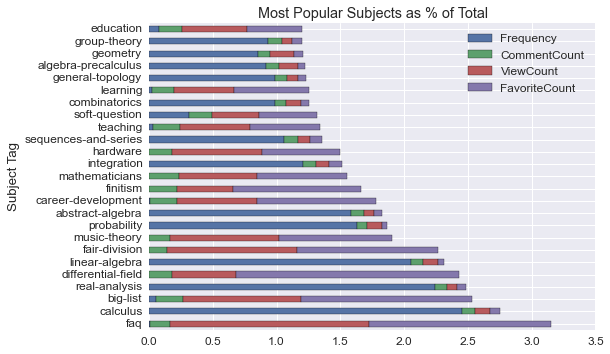

In [50]:
toptopics3 = toptopics2[['Frequency','CommentCount','ViewCount','FavoriteCount']]
sns.set(font_scale=1.2)   
sns.set_palette("deep", desat=.8)
ax = toptopics3[1:26].plot(kind='barh',stacked=True,title='Most Popular Subjects as % of Total',rot=0)
ax.set_ylabel("Subject Tag",rotation = 90)
sns.set_context(rc={"figure.figsize": (8, 20),'figure.facecolor':'cornflowerblue'})

## Document Clustering

In [ ]:
# k-means have to specify clusters
# look at inertia curve for a natural kink 
# with mini-batch k-means it is much faster (for full dataset)

# hierarchical - don't have to specify


In [29]:
import numpy as np
import pandas as pd
import nltk
import re
import os
import codecs
from sklearn import feature_extraction
import mpld3

In [45]:
postdata.columns

Index([u'AcceptedAnswerId', u'AnswerCount', u'Body', u'ClosedDate', u'CommentCount', u'CommunityOwnedDate', u'CreationDate_x', u'FavoriteCount', u'Id_x', u'LastActivityDate', u'LastEditDate', u'LastEditorDisplayName', u'LastEditorUserId', u'OwnerDisplayName', u'OwnerUserId', u'ParentId', u'PostTypeId', u'Score', u'Tags', u'Title', u'ViewCount', u'AboutMe', u'AccountId', u'Age', u'CreationDate_y', u'DisplayName', u'DownVotes', u'Id_y', u'LastAccessDate', u'Location', u'ProfileImageUrl', u'Reputation', u'UpVotes', u'Views', u'WebsiteUrl', u'Longevity', u'LongevitySeconds', u'BodyLength', u'HighSchoolSubject'], dtype='object')

##Stopwords, stemming, and tokenizing

In [25]:
stopwords = nltk.corpus.stopwords.words('english')

In [26]:
from nltk.stem.snowball import SnowballStemmer
stemmer = SnowballStemmer("english")

In [30]:
# here I define a tokenizer and stemmer which returns the set of stems in the text that it is passed

def tokenize_and_stem(text):
    # first tokenize by sentence, then by word to ensure that punctuation is caught as it's own token
    tokens = [word for sent in nltk.sent_tokenize(text) for word in nltk.word_tokenize(sent)]
    filtered_tokens = []
    # filter out any tokens not containing letters (e.g., numeric tokens, raw punctuation)
    for token in tokens:
        if re.search('[a-zA-Z]', token):
            filtered_tokens.append(token)
    stems = [stemmer.stem(t) for t in filtered_tokens]
    return stems


def tokenize_only(text):
    # first tokenize by sentence, then by word to ensure that punctuation is caught as it's own token
    tokens = [word.lower() for sent in nltk.sent_tokenize(text) for word in nltk.word_tokenize(sent)]
    filtered_tokens = []
    # filter out any tokens not containing letters (e.g., numeric tokens, raw punctuation)
    for token in tokens:
        if re.search('[a-zA-Z]', token):
            filtered_tokens.append(token)
    return filtered_tokens

In [23]:
postdatadc = postdata[postdata.HighSchoolSubject == 1]
len(postdatadc)

10653

In [33]:
#use extend so it's a big flat list of vocab
totalvocab_stemmed = []
totalvocab_tokenized = []
j = 0
for i in postdatadc.Body:
    allwords_stemmed = tokenize_and_stem(i) #for each item in 'synopses', tokenize/stem
    totalvocab_stemmed.extend(allwords_stemmed) #extend the 'totalvocab_stemmed' list
    
    allwords_tokenized = tokenize_only(i)
    totalvocab_tokenized.extend(allwords_tokenized)
    j += 1
    if j % 1000 == 0:
        print j

1000
2000
3000
4000
5000
6000
7000
8000
9000
10000


In [34]:
vocab_frame = pd.DataFrame({'words': totalvocab_tokenized}, index = totalvocab_stemmed)
print 'there are ' + str(vocab_frame.shape[0]) + ' items in vocab_frame'

there are 767985 items in vocab_frame


##Tf-idf and document similarity

In [35]:
from sklearn.feature_extraction.text import TfidfVectorizer

#define vectorizer parameters
tfidf_vectorizer = TfidfVectorizer(max_df=0.8, max_features=200000,
                                 min_df=0.2, stop_words='english',
                                 use_idf=True, tokenizer=tokenize_and_stem, ngram_range=(1,3))

%time tfidf_matrix = tfidf_vectorizer.fit_transform(postdatadc.Body) #fit the vectorizer to synopses

print(tfidf_matrix.shape)

CPU times: user 36.6 s, sys: 1.48 s, total: 38.1 s
Wall time: 37.1 s
(10653, 3)


In [36]:
terms = tfidf_vectorizer.get_feature_names()

In [37]:
from sklearn.metrics.pairwise import cosine_similarity
dist = 1 - cosine_similarity(tfidf_matrix)

##K-means clustering

In [38]:
from sklearn.cluster import KMeans

num_clusters = 5

km = KMeans(n_clusters=num_clusters)

%time km.fit(tfidf_matrix)

clusters = km.labels_.tolist()

CPU times: user 731 ms, sys: 4.29 ms, total: 735 ms
Wall time: 738 ms


In [39]:
from sklearn.externals import joblib

#uncomment the below to save your model 
#since I've already run my model I am loading from the pickle

joblib.dump(km,  'doc_cluster.pkl')

km = joblib.load('doc_cluster.pkl')
clusters = km.labels_.tolist()

In [40]:
questions = { 'Title': Title, 'ViewCount': ViewCount, 'Body': Body, 'cluster': clusters, 'Tags': Tags }

frame = pd.DataFrame(questions, index = [clusters] , columns = ['ViewCount', 'Title', 'cluster', 'Tags'])

NameError: name 'Title' is not defined

In [ ]:
frame['cluster'].value_counts() #number of films per cluster (clusters from 0 to 4)

In [ ]:
grouped = frame['ViewCount'].groupby(frame['cluster']) #groupby cluster for aggregation purposes
grouped.mean() #average rank (1 to 100) per cluster

In [ ]:
from __future__ import print_function

print("Top terms per cluster:")
print()
#sort cluster centers by proximity to centroid
order_centroids = km.cluster_centers_.argsort()[:, ::-1] 

for i in range(num_clusters):
    print("Cluster %d words:" % i, end='')
    
    for ind in order_centroids[i, :6]: #replace 6 with n words per cluster
        print(' %s' % vocab_frame.ix[terms[ind].split(' ')].values.tolist()[0][0].encode('utf-8', 'ignore'), end=',')
    print() #add whitespace
    print() #add whitespace
    
    print("Cluster %d titles:" % i, end='')
    for title in frame.ix[i]['title'].values.tolist():
        print(' %s,' % title, end='')
    print() #add whitespace
    print() #add whitespace
    
print()
print()

In [ ]:
import os  # for os.path.basename

import matplotlib.pyplot as plt
import matplotlib as mpl

from sklearn.manifold import MDS

MDS()

# convert two components as we're plotting points in a two-dimensional plane
# "precomputed" because we provide a distance matrix
# we will also specify `random_state` so the plot is reproducible.
mds = MDS(n_components=2, dissimilarity="precomputed", random_state=1)

pos = mds.fit_transform(dist)  # shape (n_components, n_samples)

xs, ys = pos[:, 0], pos[:, 1]
print()
print()

In [ ]:
#set up colors per clusters using a dict
cluster_colors = {0: '#1b9e77', 1: '#d95f02', 2: '#7570b3', 3: '#e7298a', 4: '#66a61e'}

#set up cluster names using a dict
cluster_names = {0: 'Family, home, war', 
                 1: 'Police, killed, murders', 
                 2: 'Father, New York, brothers', 
                 3: 'Dance, singing, love', 
                 4: 'Killed, soldiers, captain'}

In [ ]:
#some ipython magic to show the matplotlib plots inline
%matplotlib inline 

#create data frame that has the result of the MDS plus the cluster numbers and titles
df = pd.DataFrame(dict(x=xs, y=ys, label=clusters, title=titles)) 

#group by cluster
groups = df.groupby('label')


# set up plot
fig, ax = plt.subplots(figsize=(17, 9)) # set size
ax.margins(0.05) # Optional, just adds 5% padding to the autoscaling

#iterate through groups to layer the plot
#note that I use the cluster_name and cluster_color dicts with the 'name' lookup to return the appropriate color/label
for name, group in groups:
    ax.plot(group.x, group.y, marker='o', linestyle='', ms=12, 
            label=cluster_names[name], color=cluster_colors[name], 
            mec='none')
    ax.set_aspect('auto')
    ax.tick_params(\
        axis= 'x',          # changes apply to the x-axis
        which='both',      # both major and minor ticks are affected
        bottom='off',      # ticks along the bottom edge are off
        top='off',         # ticks along the top edge are off
        labelbottom='off')
    ax.tick_params(\
        axis= 'y',         # changes apply to the y-axis
        which='both',      # both major and minor ticks are affected
        left='off',      # ticks along the bottom edge are off
        top='off',         # ticks along the top edge are off
        labelleft='off')
    
ax.legend(numpoints=1)  #show legend with only 1 point

#add label in x,y position with the label as the film title
for i in range(len(df)):
    ax.text(df.ix[i]['x'], df.ix[i]['y'], df.ix[i]['title'], size=8)  

    
    
plt.show() #show the plot

#uncomment the below to save the plot if need be
#plt.savefig('clusters_small_noaxes.png', dpi=200)

In [ ]:
#define custom toolbar location
class TopToolbar(mpld3.plugins.PluginBase):
    """Plugin for moving toolbar to top of figure"""

    JAVASCRIPT = """
    mpld3.register_plugin("toptoolbar", TopToolbar);
    TopToolbar.prototype = Object.create(mpld3.Plugin.prototype);
    TopToolbar.prototype.constructor = TopToolbar;
    function TopToolbar(fig, props){
        mpld3.Plugin.call(this, fig, props);
    };

    TopToolbar.prototype.draw = function(){
      // the toolbar svg doesn't exist
      // yet, so first draw it
      this.fig.toolbar.draw();

      // then change the y position to be
      // at the top of the figure
      this.fig.toolbar.toolbar.attr("x", 150);
      this.fig.toolbar.toolbar.attr("y", 400);

      // then remove the draw function,
      // so that it is not called again
      this.fig.toolbar.draw = function() {}
    }
    """
    def __init__(self):
        self.dict_ = {"type": "toptoolbar"}

In [ ]:
#create data frame that has the result of the MDS plus the cluster numbers and titles
df = pd.DataFrame(dict(x=xs, y=ys, label=clusters, title=titles)) 

#group by cluster
groups = df.groupby('label')

#define custom css to format the font and to remove the axis labeling
css = """
text.mpld3-text, div.mpld3-tooltip {
  font-family:Arial, Helvetica, sans-serif;
}

g.mpld3-xaxis, g.mpld3-yaxis {
display: none; }

svg.mpld3-figure {
margin-left: -200px;}
"""

# Plot 
fig, ax = plt.subplots(figsize=(14,6)) #set plot size
ax.margins(0.03) # Optional, just adds 5% padding to the autoscaling

#iterate through groups to layer the plot
#note that I use the cluster_name and cluster_color dicts with the 'name' lookup to return the appropriate color/label
for name, group in groups:
    points = ax.plot(group.x, group.y, marker='o', linestyle='', ms=18, 
                     label=cluster_names[name], mec='none', 
                     color=cluster_colors[name])
    ax.set_aspect('auto')
    labels = [i for i in group.title]
    
    #set tooltip using points, labels and the already defined 'css'
    tooltip = mpld3.plugins.PointHTMLTooltip(points[0], labels,
                                       voffset=10, hoffset=10, css=css)
    #connect tooltip to fig
    mpld3.plugins.connect(fig, tooltip, TopToolbar())    
    
    #set tick marks as blank
    ax.axes.get_xaxis().set_ticks([])
    ax.axes.get_yaxis().set_ticks([])
    
    #set axis as blank
    ax.axes.get_xaxis().set_visible(False)
    ax.axes.get_yaxis().set_visible(False)

    
ax.legend(numpoints=1) #show legend with only one dot

mpld3.display() #show the plot

#uncomment the below to export to html
#html = mpld3.fig_to_html(fig)
#print(html)

In [ ]:
from scipy.cluster.hierarchy import ward, dendrogram

linkage_matrix = ward(dist) #define the linkage_matrix using ward clustering pre-computed distances

fig, ax = plt.subplots(figsize=(15, 20)) # set size
ax = dendrogram(linkage_matrix, orientation="right", labels=titles);

plt.tick_params(\
    axis= 'x',          # changes apply to the x-axis
    which='both',      # both major and minor ticks are affected
    bottom='off',      # ticks along the bottom edge are off
    top='off',         # ticks along the top edge are off
    labelbottom='off')

plt.tight_layout() #show plot with tight layout

#uncomment below to save figure
plt.savefig('ward_clusters.png', dpi=200) #save figure as ward_clusters

## Begin ML test

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.cross_validation import train_test_split
from sklearn import linear_model, datasets, metrics
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.cross_validation import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.learning_curve import learning_curve
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import GradientBoostingClassifier, RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.datasets import make_classification
from sklearn.metrics import roc_auc_score
from sklearn import preprocessing

In [ ]:
# postdataml = postdata[postdata.HighSchoolSubject != 0.5]
# X = postdataml[['AnswerCount','BodyLength','CommentCount','FavoriteCount','ViewCount','LongevitySeconds','BodyLength']]
# y = postdataml.HighSchoolSubject

In [ ]:
print len(postdata)
print len(postdataml)

In [ ]:
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 42)
# std_scale = preprocessing.StandardScaler().fit(X_train)
# X_train_std = std_scale.transform(X_train)
# X_test_std = std_scale.transform(X_test)

In [ ]:
# models = [LogisticRegression(), SVC(probability = True), GaussianNB(), DecisionTreeClassifier(max_depth = 4), RandomForestClassifier(), KNeighborsClassifier(n_neighbors = 9)]

# def roc_param(estimator, train_X, test_X):
#     model = estimator
#     model.fit(train_X, y_train)
#     if estimator == SVC():
#         test_pred = model.predict(test_X)
#         fpr, tpr, _ = metrics.roc_curve(y_test, test_pred)
#     else:
#         test_pred = model.predict_proba(test_X)
#         fpr, tpr, _ = metrics.roc_curve(y_test, test_pred[:,1])
#     roc_params = [fpr, tpr]
#     return roc_params

In [ ]:
# log_scaled_roc = roc_param(models[0], X_train_std, X_test_std)
# svc_scaled_roc = roc_param(models[1], X_train_std, X_test_std)
# gnb_scaled_roc = roc_param(models[2], X_train_std, X_test_std)
# dtree_scaled_roc = roc_param(models[3], X_train_std, X_test_std)
# rf_scaled_roc = roc_param(models[4], X_train_std, X_test_std)
# knn_scaled_roc = roc_param(models[5], X_train_std, X_test_std)

In [ ]:
# plt.title("ROC curves for models using scaled predictors")
# plt.plot(log_scaled_roc[0], log_scaled_roc[1], "b", linewidth = 2, label = "Logistic Regression")
# plt.plot(svc_scaled_roc[0], svc_scaled_roc[1], "k", linewidth = 2, label = "Support Vector Machines")
# plt.plot(gnb_scaled_roc[0], gnb_scaled_roc[1], "g", linewidth = 2, label = "GaussianNB")
# plt.plot(dtree_scaled_roc[0], dtree_scaled_roc[1], "r", linewidth = 2, label = "Decision Tree")
# plt.plot(rf_scaled_roc[0], rf_scaled_roc[1], "c", linewidth = 2, label = "Random Forest")
# plt.plot(knn_scaled_roc[0], knn_scaled_roc[1], "y", linewidth = 2, label = "K Neighbors (9)")
# plt.legend(loc = 4, prop={'size':12})
# sns.set_context(rc={"figure.figsize": (20, 6)})   
# sns.set_palette("deep", desat=.8)
# sns.set(font_scale=1.0)
# plt.show()

In [ ]:
# scores = [accuracy_score, precision_score, recall_score, f1_score]

# def get_metrics(X_train, X_test):
    
#     # create empty lists
#     LogisticReg = []
#     SVMC = []
#     GaussNB = []
#     DecisionTree = []
#     RandomForest = []
#     kNN9 = []
    
#     # list of lists
#     lists = [LogisticReg, SVMC, GaussNB, DecisionTree, RandomForest, kNN9]
    
#     # populate lists with scores of each scoring method
#     for i, model in enumerate(models):
#         for score in scores:
#             est = model
#             est.fit(X_train, y_train)
#             pred = est.predict(X_test)
#             lists[i].append(score(y_test, pred))
        
#     # create a dataframe which aggregates the lists
#     scores_df = pd.DataFrame(data = [LogisticReg, SVMC, GaussNB, DecisionTree, RandomForest, kNN9])
#     scores_df.index = ["LogisticReg", "SVMC", "GaussNB", "DecisionTree", "RandomForest", "kNN9"]
#     scores_df.columns = ["Accuracy", "Precision", "Recall", "F1"]
#     return scores_df

In [ ]:
# get_metrics(X_train_std, X_test_std)

In [ ]:
Training set of highschool or not
Convert every question into TFIDF vector
Use TFIDF vector as all features
Every question is a row
Every column is a word

Implement binary classifier
Plot learning curve and cross validate

In [ ]:
Apply classification to untagged questions to get high-school/non-high school

In [ ]:
Now we have more high school questions out of a million

In [ ]:
Now run clustering to get topics
run mini batch k-means with a bunch of different k's
look at intertia curve for a kink, with different k's, what is the squared distance between centroid and top'
use cosine distance
run aglomerative hierarchical clustering so don't need to know how many clusters
tweak as much as i have time

In [ ]:
Answer the questions about fundamental topics which are the pain points
which clusters have the most fundamental topics
which clusters are overrepresented with fundamental topics

In [ ]:
Secondary analysis within calculus questions, what are fundamental topics

In [ ]:
Visualizations


To Do: 
1. Exploratory viz stuff
2. Classify education level
    - I am 99% sure that it is a high school level question (ex: geometry)
    - I am 100% sure that these are not high school level (ex: abstract algebra)
3. Clustering on text to get more high school texts within untagged posts
4. Data viz on high school / not high school
5. Topic modeling for more granularity within tags
6. what topics are students struggling with in their subjects which might make them give up
7. Most complex, hotly debated, or fundamental

### Presentation
- High school is like a user experience. How can we identify when high school students as users  of the education system experience pain points which may inhibit their progress. 
- Everyone has pain points with the process. Some students are able to surmount those obstacles, while other may need targeted help to get the most out of the available system.
- Often when speaking about mathematics you hear people say that they aren't math people, or aren't good at math and you find out that they hit a wall. It's like anything in life which is difficult. You hit a wall and you either push through it or you don't. 
- present it as a paradigm which is a process which can be improved upon. there are answers that we can deivgn about how to teach people that are better or worse than others. Testing to figure out where are the pain points and where are students falling behind, particularly in math/science. 
- These are users /consumers of education. 
- I'm builing a tool which can target at what point students are exiting the process. 